<a href="https://colab.research.google.com/github/Raj123majumder/MINI_PROJECT_NLP/blob/main/mini_binary_tree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###importing the required libraries

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
### importing the libraries
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
##ps = PorterStemmer()

In [ ]:
### PrePocessing of the Data
paragraph = """Attention mechanism is one of the recent advancements in Deep learning especially for 
               Natural language processing tasks like Machine translation, Image Captioning, dialogue generation etc. It is a mechanism that 
               is developed to increase the performance of encoder decoder(seq2seq) RNN model. In this blog post I will try to explain the 
               attention mechanism for the text classification task.Attention is proposed as a solution to the limitation of the 
               Encoder-Decoder model which encodes the input sequence to one fixed length vector from which to decode the output at 
               each time step. This issue is believed to a problem when decoding long sequences because it make difficult for the neural network to cope 
               with long sentences, especially those that are longer than the sentences in the training corpus.In attention when the model is trying 
               to predict the next word it searches for a set of positions in a source sentence where the most relevant information is concentrated. 
               The model then predicts next word based on context vectors associated with these source positions and all the previous generated target 
               words.Instead of encoding the input sequence into a single fixed context vector, the attention model develops a context vector that is 
               filtered specifically for each output time step.Self-attention, also known as intra-attention, is an attention 
               mechanism relating different positions of a single sequence in order to compute a representation of the same sequence. 
               It has been shown to be very useful 
               in machine reading, abstractive summarization, or image description generation.Neural Machine Translation (NMT) achieved
               state-of-the-art performances in large-scale translation tasks such as from English to French
               (Luong et al., 2015) and English to German
               (Jean et al., 2015). NMT is appealing since it requires minimal domain knowledge and is conceptually simple. 
               The model by Luong et al. (2015)
               reads through all the source words until the end-ofsentence symbol <eos> is reached. It then starts emitting one 
               target word at a time, as illustrated in
               Figure 1. NMT is often a large neural network that
               is trained in an end-to-end fashion and has the ability to generalize well to very long word sequences.
               This means the model does not have to explicitly
               store gigantic phrase tables and language models
               as in the case of standard MT; hence, NMT has
               a small memory footprint. Lastly, implementing
               NMT decoders is easy unlike the highly intricate
               decoders in standard MT (Koehn et al., 2003).
               The bloody Siege of Chittorgarh in 1567-1568 had led to the loss of the fertile eastern belt of Mewar to the Mughals. However, the rest of the wooded and hilly kingdom in the Aravalli range was still under the control of Maharana Pratap. Mughal Emperor Akbar was intent on securing a stable route to Gujarat through Mewar; when Pratap Singh was crowned king (Maharana) in 1572, Akbar sent a number of envoys, including one by Raja Man Singh of Amer, entreating him to become a vassal like many other rulers in Rajputana. When Pratap refused to personally submit to Akbar, war became inevitable.[14][15]The Battle of Haldighati was fought on 18 June 1576 between Pratap Singh and Mughal forces led by Man Singh I of Amer. The Mughals were victorious and inflicted significant casualties among the Mewaris but failed to capture the Pratap.[16][17][18] The site of the battle was a narrow mountain pass at Haldighati near Gogunda, modern day Rajsamand in Rajasthan. Pratap Singh fielded a force of around 3000 cavalry and 400 Bhil archers. The Mughals were led by Man Singh of Amber, who commanded an army numbering around 10,000 men. After a fierce battle lasting more than three hours, Pratap found himself wounded and the day lost. He managed to retreat to the hills and lived to fight another day.[19]
               Haldighati was a futile victory for the Mughals, as they were unable to kill or capture Pratap, or any of his close family members in Udaipur.[20] While the sources also claim that Pratap was able to make a successful escape, Mansingh managed to conquer Gogunda within a week after Haldighati then ended his campaign. Subsequently, Akbar himself led a sustained campaign against the Rana in September 1576, and soon, Gogunda, Udaipur, and Kumbhalgarh were all under Mughal control
               Maharana Pratap was born in Hindu Rajput family to Udai Singh II of Mewar and Jaiwanta Bai.[5][6][7] His younger brothers were Shakti Singh, Vikram Singh and Jagmal Singh. Pratap also had 2 stepsisters: Chand Kanwar and Man Kanwar. He was married to Ajabde Punwar of Bijolia[8] and he had married 10 other women and was survived by 17 sons and 5 daughters including Amar Singh I.[9] He belonged to the Royal Family of Mewar.[10] After the death of Udai Singh in 1572, Rani Dheer Bai wanted her son Jagmal to succeed him[11] but senior courtiers preferred Pratap, as the eldest son, to be their king. The desire of the nobles prevailed. Udai Singh died in 1572, and Prince Pratap ascended the throne as Maharana Pratap, the 54th ruler of Mewar in the line of the Sisodia Rajputs.[12] Jagmal swore revenge and left for Ajmer, to join the armies of Akbar, 
               and obtained the town of Jahazpur as a Jagir as a gift in return for his help.
               Maharana Pratap took refuge in the Chappan area and started attacking the Mughal strongholds. By 1583 he had successfully captured western Mewar, which included Dewar, Amet, Madariya, Zawar and the fort of Kumbalgarh. He then made Chavand his capital and constructed a Chamunda mata temple there. The Maharana was able to live in peace for a short time and started establishing order in Mewar. From 1585 till his death, the Rana had recovered a large part of Mewar. The citizens who had migrated out of Mewar started returning during this time. There was good monsoon which helped to revive the agriculture of Mewar. The economy also started getting better and trade in the area started increasing. The Rana was able to capture the territories west of Chittor but could not fulfill his dream of capturing Chittor itself.
               In parallel, the concept of “attention” has
               gained popularity recently in training neural networks, allowing models to learn alignments between different modalities, e.g., 
               between image
               objects and agent actions in the dynamic control problem (Mnih et al., 2014), between speech
               frames and text in the speech recognition task (?), or between visual features of a picture and
               its text description in the image caption generation task (Xu et al., 2015). In the context of
               NMT, Bahdanau et al. (2015) has successfully applied such attentional mechanism to jointly translate and align words. To the best of our knowledge, there has not been any other work exploring
               the use of attention-based architectures for NMT.
               Mughal pressure on Mewar relaxed after 1579 following rebellions in Bengal and Bihar and Mirza Hakim's incursion into the Punjab.But after this Akbar sent Abdul Rahim Khan-i-Khanan to invade Mewar but he, stopped at Ajmer. In 1582, Pratap Singh attacked and occupied the Mughal post at Dewair (or Dewar) in the Battle of Dewair.[21] This led to the automatic liquidation of all 36 Mughal military outposts in Mewar. After this Akbar sent Jagannath Kachhwaha to invade Mewar in 1584. In 1585, Akbar moved to Lahore and remained there for the next twelve years watching the situation in the north-west. No major Mughal expedition was sent to Mewar during this period. Taking advantage of the situation, Pratap recovered most of Mewar (except its former capital, Chittorgarh, Mandalgarh and Vagad[22][citation needed] regions) by defeating Mughal forces there. During this period, he also built a new capital, Chavand, near modern Dungarpur.
               A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.
               In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated."""

wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
new_corpus = []
y = []
for i in range(len(sentences)):
  review = re.sub('[^a-zA-Z]', ' ', sentences[i])
  review = review.lower()
  review = review.split()
  review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
  y.append(review[-1])
  review = ' '.join(review[:-1])
  new_corpus.append(review)

In [ ]:
###the new corpus
y

['etc',
 'model',
 'step',
 'concentrated',
 'sequence',
 'al',
 'simple',
 'al',
 'reached',
 'figure',
 'sequence',
 'footprint',
 'al',
 'mughals',
 'pratap',
 'rajputana',
 'inevitable',
 'amer',
 'pratap',
 'rajasthan',
 'archer',
 'men',
 'lost',
 'day',
 'udaipur',
 'campaign',
 'bai',
 'singh',
 'kanwar',
 'singh',
 'mewar',
 'king',
 'prevailed',
 'rajput',
 'help',
 'stronghold',
 'kumbalgarh',
 'temple',
 'mewar',
 'mewar',
 'time',
 'mewar',
 'increasing',
 'chittor',
 'task',
 'al',
 'al',
 'word',
 'nmt',
 'ajmer',
 'dewair',
 'mewar',
 'mewar',
 'west',
 'period',
 'force',
 'dungarpur',
 'g',
 'attribute',
 'rule',
 'calculated']

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

for i in new_corpus[:6]:
  doc = nlp(i)
  displacy.render(doc, jupyter=True, style="dep")

In [ ]:
#vocab_size = 1000
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_corpus)
feat = vectorizer.get_feature_names_out()

In [ ]:
X.shape, len(y)

((61, 488), 61)

In [ ]:
import pandas as pd
X = X.todense()

In [ ]:
X = np.array(X)

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X[:, 4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.17735622, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y

array([13, 27, 41,  9, 38,  1, 39,  1, 36, 14, 38, 15,  1, 28, 31, 35, 20,
        2, 31, 33,  3, 25, 24, 10, 46,  7,  5, 40, 21, 40, 26, 22, 32, 34,
       18, 42, 23, 44, 26, 26, 45, 26, 19,  8, 43,  1,  1, 48, 29,  0, 11,
       26, 26, 47, 30, 16, 12, 17,  4, 37,  6])

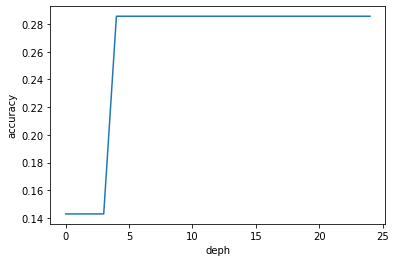

In [ ]:
from collections import Counter

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1, random_state=1234
    )

    accy = []
    dep = []

    for i in range(25):
      clf = DecisionTree(max_depth=i)
      clf.fit(X_train, y_train)

      y_pred = clf.predict(X_test)
      acc = accuracy(y_test, y_pred)
      accy.append(acc)
      dep.append(i)
    
    plt.figure()
    plt.plot(dep, accy)
    plt.xlabel('deph')
    plt.ylabel('accuracy')
    plt.show()

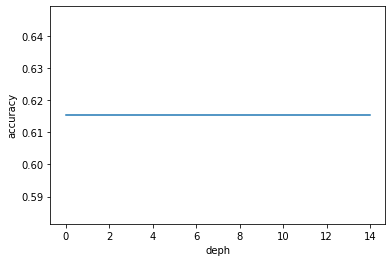

Accuracy: 0.6153846153846154


In [ ]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

  

if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    accy = []
    dep = []

    for i in range(15):

      model = RandomForest(n_trees=3, max_depth=i)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      acc = accuracy(y_test, y_pred)

      y_pred = clf.predict(X_test)
      acc = accuracy(y_test, y_pred)
      accy.append(acc)
      dep.append(i)
    
    plt.figure()
    plt.plot(dep, accy)
    plt.xlabel('deph')
    plt.ylabel('accuracy')
    plt.show()

    print("Accuracy:", acc)